<a href="https://colab.research.google.com/github/AnnaZeng22/High-tone-shift-in-BMRS/blob/main/q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 1和2写了都是为3服务，主要看3的bug，1.2也有可能有bug，1.1和2应该没有什么问题。
2. 3的问题是：3.1参数算的不正确，grammar中value为0应该有10个，我做出来11个；于是3.2也误差很大
3. 3.2问题是误差大，一个总是return false
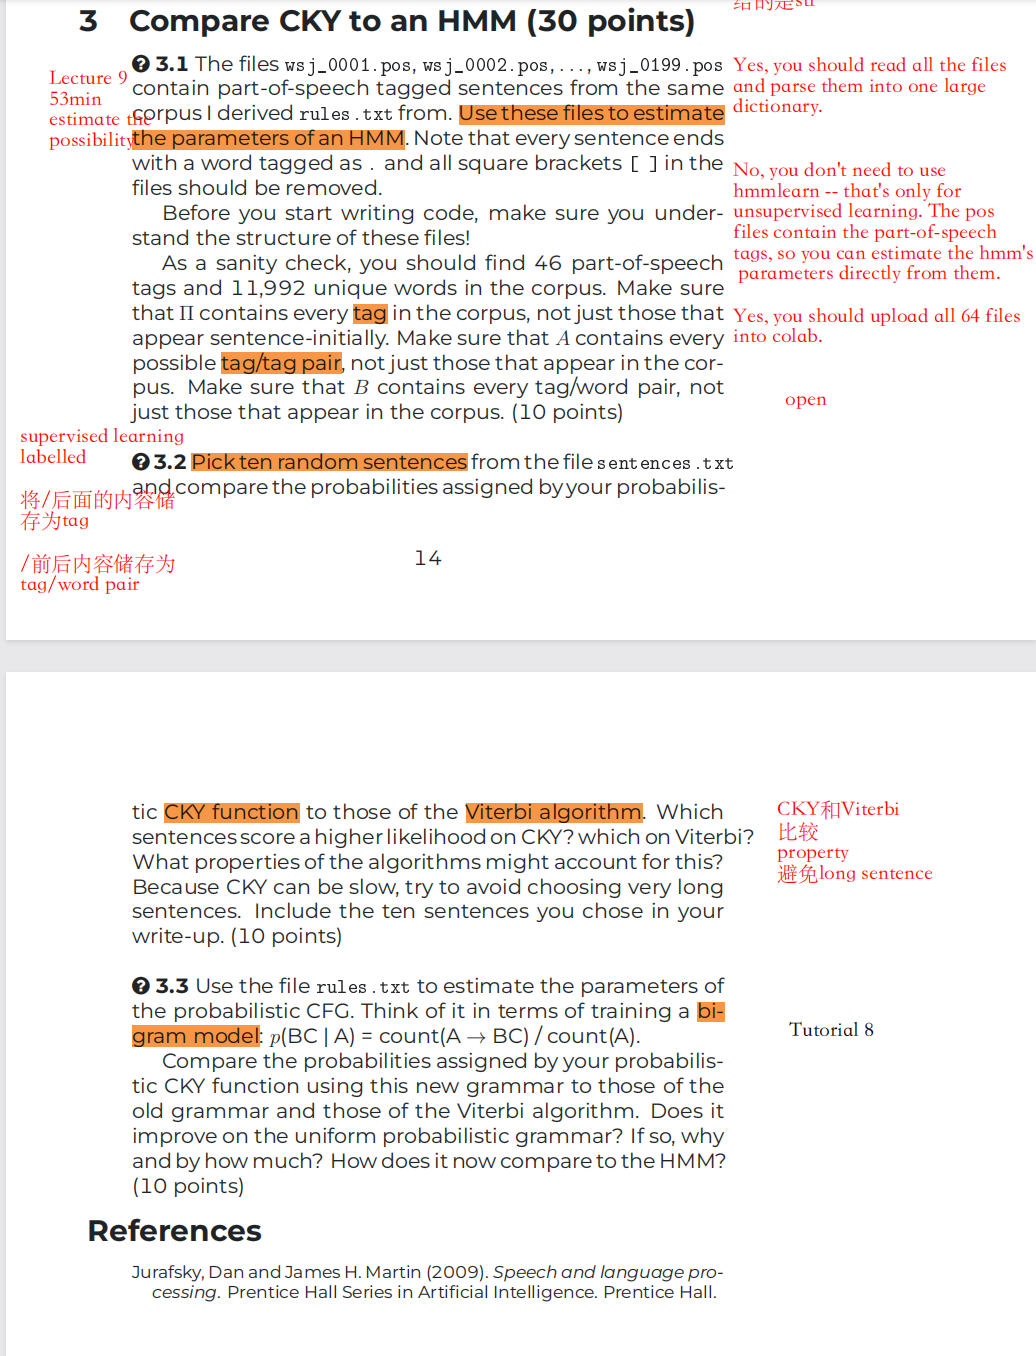

In [ ]:
### Question 1.1 ###

def cky(words, grammar):
  ### ARGUMENTS ###
  # words is a list of words, e.g., ['the', 'cat', 'tolerate', 'a', 'dog']
  # grammar is a dictionary representing a CFG, e.g.,
  #     { "NP" : [["D", "N"], "cats", "dogs"],
	#		    "VP" : [["V", "NP"], "walk", "sleep"],
	# 		  "S"  : [["NP", "VP"]],
	# 		  "D"  : ["the", "a"],
	# 		  "N"  : ["cat", "dog"],
	# 		  "V"  : ["love", "tolerate"]
  #     }


  ### YOUR CODE GOES HERE ###

  #initiate the 5*6 table
  table = [[[] for _ in range(len(words) + 1)] for _ in range(len(words))]

  # outer loop
  for j in range(1, len(words) + 1):
    for key, value in grammar.items():
      if words[j-1] in value:
        table[j-1][j].append(key)

        # check (i,k) and (k,j) to fill (i,j)
        for i in range(j-2, -1, -1):
            for k in range(i+1, j):
              combination = []
              for a in table[i][k]:
                for b in table[k][j]:
                  combination.append(a)
                  combination.append(b)
                  for key, value in grammar.items():
                    if combination in value:
                      table[i][j].append(key)

  # check (0,j)
  if 'S' in table[0][j]:
    return True
  else:
    return False


  ### OUTPUT ###
  # return True is words can be parsed into a sentence and False otherwise
  #return 'this is just a placeholder'
words = []
words = 'the cat tolerate a dog'.split()#sample, input any words string here##问题是带时态吗
grammar = {"NP" : [["D", "N"], "cats", "dogs"],
           "VP" : [["V", "NP"], "walk", "sleep"],
           "S"  : [["NP", "VP"]],
           "D"  : ["the", "a"],
           "N"  : ["cat", "dog"],
           "V"  : ["love", "tolerate"]
           }#sample, input any grammar here
cky(words,grammar)



True

In [ ]:
### Question 1.2 ###
# rules.txt is available on Moodle
# toy.txt is available on Moodle

### YOUR CODE GOES HERE ###
def build_grammar(lines):
    grammar = {}
    for line in lines:
        parts = line.split("➡️")###
        key = parts[0].strip()
        if "🦖" in parts[1]:
          value = [part.strip() for part in parts[1].split("🦖")]
        else:
          value = [parts[1].strip()]

        if key in grammar:
            grammar[key].append(value)
        else:
            grammar[key] = value

    return grammar


f = open('rules.txt')
grammar = build_grammar(f)
f.close()

print(grammar)




{'S': ['NP', 'S|<VP-.>', ['NP', 'S|<VP-.>'], ['NP', 'S|<VP-.>'], ['S', 'S|<,-NP-VP-.>'], ['NP', 'VP'], ['S', 'S|<,-NP-VP-.>'], ['NP', 'VP'], ['NP', 'VP'], ['NP', 'VP'], ['NP', 'S|<VP-.>'], ['SBAR', 'S|<,-NP-VP-.>'], ['NP', 'VP'], ['NP', 'S|<VP-.>'], ['NP', 'VP'], ['NP', 'S|<VP-.>'], ['NP', 'VP'], ['NP', 'VP'], ['NP', "S|<VP-.-''>"], ['NP', 'S|<VP-.>'], ['NP', 'VP'], ['NP', 'VP'], ['NP', 'S|<VP-.>'], ['NP', 'S|<VP-.>'], ['S', 'S|<,-NP-VP-.>'], ['PP', 'S|<,-NP-VP>'], ['PP', 'S|<,-NP-VP-.>'], ['NP', 'S|<VP-.>'], ['S', 'S|<,-NP-VP-.>'], ['NP', 'VP'], ['NP', 'VP'], ['S', 'S|<,-NP-VP-.>'], ['NP', 'VP'], ['NP', 'S|<VP-.>'], ['S', 'S|<,-NP-VP-.>'], ['NP', 'S|<ADVP-VP>'], ['NP', 'VP'], ['NP', 'S|<VP-.>'], ['S', 'S|<,-NP-VP-.>'], ['NP', 'VP'], ['PP', 'S|<,-NP-VP-.>'], ['PP', 'S|<,-NP-VP-.>'], ['NP', 'S|<VP-.>'], ['NP', 'S|<VP-.>'], ['NP', 'VP'], ['NP', 'S|<VP-.>'], ['NP', 'S|<VP-.>'], ['NP', 'VP'], ['NP', 'VP'], ['NP', 'VP'], ['``', 'S|<CC-NP-VP-.>'], ['NP', 'VP'], ['NP', 'S|<VP-.>'], ['NP', 'S|

In [ ]:
### Question 2.1 ###
def uniform(grammar):

  ### ARGUMENTS ###
  # grammar is a dictionary representing a CFG, e.g.,
  #     { "NP" : [["D", "N"], "cats", "dogs"],
	#		    "VP" : [["V", "NP"], "walk", "sleep"],
	# 		  "S"  : [["NP", "VP"]],
	# 		  "D"  : ["the", "a"],
	# 		  "N"  : ["cat", "dog"],
	# 		  "V"  : ["love", "tolerate"]
  #     }


  ### YOUR CODE GOES HERE ###
  for key, value in grammar.items():
        if isinstance(value, list):
            total_expansions = len(value)
            probability = 1.0 / total_expansions
            for i, item in enumerate(value):
                if isinstance(item, list):
                    grammar[key][i] = [item, probability]
                else:
                    grammar[key][i] = [item, probability]

# grammar
grammar = {
    "NP": [["D", "N"], "cats", "dogs"],
    "VP": [["V", "NP"], "walk", "sleep"],
    "S": [["NP", "VP"]],
    "D": ["the", "a"],
    "N": ["cat", "dog"],
    "V": ["love", "tolerate"]
    }#sample input any grammar here


  ### OUTPUT ###
  # you can directly update the grammar dictionary; there is no need to return anything
uniform(grammar)
grammar

{'NP': [[['D', 'N'], 0.3333333333333333],
  ['cats', 0.3333333333333333],
  ['dogs', 0.3333333333333333]],
 'VP': [[['V', 'NP'], 0.3333333333333333],
  ['walk', 0.3333333333333333],
  ['sleep', 0.3333333333333333]],
 'S': [[['NP', 'VP'], 1.0]],
 'D': [['the', 0.5], ['a', 0.5]],
 'N': [['cat', 0.5], ['dog', 0.5]],
 'V': [['love', 0.5], ['tolerate', 0.5]]}

In [ ]:
### Question 2.2 ###

import math

def pcky(words, grammar):
  ### ARGUMENTS ###
  # words is a list of words, e.g., ['the', 'cat', 'tolerate', 'a', 'dog']
  # grammar is a dictionary representing a probabilistic CFG, e.g.,
  #   {
	# 	  "NP": [
	#  					  [["D", "N"], 0.3333333333333333],
	# 					  ["cats", 0.3333333333333333],
	# 					  ["dogs", 0.3333333333333333]
	# 				  ],
	# 	  "VP": [
	# 					  [["V", "NP"], 0.3333333333333333],
	# 					  ["walk", 0.3333333333333333],
	# 					  ["sleep", 0.3333333333333333]
	# 				  ],
	# 	  "S": [[["NP", "VP"], 1.0]],
	# 	  "D": [["the", 0.5], ["a", 0.5]],
	# 	  "N": [["cat", 0.5], ["dog", 0.5]],
	# 	  "V": [["love", 0.5], ["tolerate", 0.5]]
	#   }


  ### YOUR CODE GOES HERE ###
	#initiate the 5*6 table
  table = [[[] for _ in range(len(words) + 1)] for _ in range(len(words))]


  # j outer loop
  for j in range(1, len(words) + 1):
    for key, value in grammar.items():
      for c in range(0,len(value)): #e.g.'N': [['cat', 0.5], ['dog', 0.5]]

        if words[j-1] == value[c][0]:#check if 'cat' in the list of value lists
           table[j-1][j].append({key:math.log(value[c][1])})#append the key and value to a dictionar and store it into the cell (j-1,j)

        # (i,k) and (k,j) to fill (i,j)
        for i in range(j-2, -1, -1):
          for k in range(i+1, j):
            combination = []
            for d in range(0,len(table[i][k])):# e.g. 'NP': [[['D', 'N'], 0.3333333333333333],['cats', 0.3333333333333333],['dogs', 0.3333333333333333]]
               for key_1,value_1 in table[i][k][d].items():
                a = key_1 # e.g.table[i][k] is [{'D':0.5},{}, ...], we want to get 'D', and from table[k][j] getting 'N'
                p_ik = value_1
            for e in range(0,len(table[k][j])):
              for key_2,value_2 in table[k][j][e].items():
                b = key_2
                p_kj = value_2
                #combination = []#
                combination.append(a)#['D', 'N']
                combination.append(b)
                p = p_ik + p_kj

                for key_3, value_3 in grammar.items():
                  for f in range(0,len(value_3)):# e.g. 'NP': [[['D', 'N'], 0.3333333333333333],['cats', 0.3333333333333333],['dogs', 0.3333333333333333]]
                    if combination == value_3[f][0]:
                      table[i][j].append({key_3:math.log(value_3[f][1])+p})

  # check (0,j)
  tell_S = False
  max = None
  for h in range(0,len(table[0][j])):
    if 'S' in table[0][j][h]:### table[0][j] is [{'S':1.0},{},...]###use 'in' or '=='?
       if tell_S == False:
          tell_S = True
          max = table[0][j][h]['S']
       else:
          if table[0][j][h]['S'] >= max:
            max = table[0][j][h]['S']

  if tell_S == False:
    return False
  else:
    return max

#words
words = ['the', 'cat', 'tolerate', 'a', 'dog']

###dictionary
grammar = {
    "NP": [["D", "N"], "cats", "dogs"],
    "VP": [["V", "NP"], "walk", "sleep"],#
    "S": [["NP", "VP"]],
    "D": ["the", "a"],
    "N": ["cat", "dog"],
    "V": ["love", "tolerate"]
}
uniform(grammar)



  ### OUTPUT ###
  # return the log likelihood of the most probable parse if words can be parsed
  #    into a sentence and False otherwise
  #return 'this is just a placeholder'
pcky(words, grammar)

-6.761572768804056

In [ ]:
### Question 3.1 ### can run but the tag number is wrong
# wsj_0XXX.pos files are available on Moodle in tagged.zip
A = {}
B = {}
Π = {}

### YOUR CODE GOES HERE ###
import collections
tag_list = []
word_list = []
lines_string = ""
all_tags = set()


file_paths = ["wsj_{:04d}.pos".format(i) for i in range(1, 200)]#打开199个文件

for file_path in file_paths:
    prev_tag = ""
    with open(file_path, "r") as file:
        for line in file:
            line = line.strip()
            line = line.replace("[", "").replace("]", "")
            print(line)
            if line.startswith("=") or not line:
                continue

            lines_string += line + " " ##

# parse the line
lines_string = lines_string.replace("./.", "./.😊")
lines = lines_string.split("😊")


for line in lines:
    if not line.strip():
        continue
    tokens = line.split()

    for i, token in enumerate(tokens):
        if "/" not in token:
            continue
        word, tag = token.rsplit("/", 1)
        tag_list.append(tag)
        word_list.append(word)
        all_tags.add(tag)


        # first word in the sentence
        if i == 0:
            if tag in Π:
                Π[tag] += 1
            else:
                Π[tag] = 1
        else:
            # transition
            if prev_tag not in A:
                A[prev_tag] = {}
            if tag not in A[prev_tag]:
                A[prev_tag][tag] = 0
            A[prev_tag][tag] += 1

        # emission
        if tag not in B:
            B[tag] = {}
        if word not in B[tag]:
            B[tag][word] = 0
        B[tag][word] += 1

        prev_tag = tag

# Π
# Ensure Π includes all tags and normalize
for tag in all_tags:
    if tag not in Π:
        Π[tag] = 0

total = sum(Π.values())
if total != 0:
    for tag in Π:
        Π[tag] /= total
else:
    for tag in Π:
        Π[tag] = 0
total = sum(Π.values())
if total != 0:
    for tag in Π:
        Π[tag] /= total

# A
for a in A:
    total = sum(A[a].values())
    if total != 0:
      for b in A[a]:
        A[a][b] /= total
    else:
      for b in A[a]:
        A[a][b] = 0

# B
for q in B:
    total = sum(B[q].values())
    if total != 0:
      for o in B[q]:
        B[q][o] /= total
    else:
      for o in B[q]:
        B[q][o] = 0

# Print the results (optional)
print("Π:", Π)
print("A:", A)
print("B:", B)

#sanity check
tag_counts = collections.Counter(tag_list)
unique_tags = len(tag_counts)
word_counts = collections.Counter(word_list)
unique_words = len(word_counts)
print("-------sanity check-------")
print("tag_counts:", unique_tags)
print("word_counts:",unique_words)





Π: {'NNP': 0.17868338557993732, 'DT': 0.22021943573667718, 'IN': 0.12068965517241383, 'PRP': 0.05694879832810869, 'EX': 0.004440961337513063, "''": 0.06269592476489029, '``': 0.07366771159874609, 'CD': 0.007314524555903868, 'RBR': 0.0007836990595611287, 'NNS': 0.04310344827586208, 'NN': 0.04153605015673982, 'JJ': 0.03422152560083595, 'JJR': 0.003134796238244515, 'RB': 0.043887147335423204, 'WRB': 0.00600835945663532, 'CC': 0.047544409613375145, 'VBG': 0.01071055381400209, 'WDT': 0.0005224660397074192, 'VBN': 0.00626959247648903, '(': 0.004440961337513063, ')': 0.004179728317659353, 'VB': 0.004440961337513063, 'WP': 0.003134796238244515, 'PRP$': 0.0067920585161964486, 'TO': 0.002873563218390805, 'JJS': 0.0013061650992685478, 'NNPS': 0.0026123301985370956, 'VBZ': 0.001828631138975967, 'VBD': 0.0007836990595611287, 'LS': 0.0013061650992685478, ':': 0.0020898641588296767, 'VBP': 0.0002612330198537096, 'PDT': 0.0007836990595611287, 'MD': 0.0002612330198537096, 'RBS': 0.0005224660397074192, 

In [ ]:
### Question 3.2 ###问题跑起来
import math

def viterbi(A, B, Π, words):
  ### ARGUMENTS ###
  # A is a dictionary representing the transition probabilities
  # B is a dictionary representing the emission probabilities
  # Π is a dictionary representing the starting state probabilities
  # words is a list of words, e.g., ['the', 'cat', 'tolerate', 'a', 'dog']

  ### YOUR CODE GOES HERE ###
  lattice = []
  for o in words:
      lattice.append({})
      for q in A:
        lattice[-1][q] = [float('-inf'),'']

  # initialization step
  for q in A:
      if q in Π and words[0] in B[q]:
          lattice[0][q][0] = math.log(Π[q]) + math.log(B[q][words[0]])

  # recursive step
  for t in range(1, len(words)):
      for qⱼ in A:
        max = float('-inf')
        pre = ''
        for qᵢ in A:
          if words[t] not in B[qⱼ]:
            p = lattice[t-1][qᵢ][0] + math.log(A[qᵢ].get(qⱼ, 1e-10))
          else:
            p = lattice[t-1][qᵢ][0] + math.log(A[qᵢ].get(qⱼ, 1e-10)) + math.log(B[qⱼ][words[t]])
          if p > max:
            max = p
            pre = qᵢ
        lattice[t][qⱼ] = [max, pre]

  path = []
  # find most prob state at time T
  max = float('-inf')
  end = ''
  for q in A:
      if lattice[-1][q][0] > max:
        max = lattice[-1][q][0]
        end = q

  path.append(end)
  backpoint = path[-1]
  for t in range(len(words) - 1, 0, -1):
      path.append(lattice[t][backpoint][1])
      backpoint = path[-1]

  return p

### PCKY ###
import math

def uniform(grammar):
  for key, value in grammar.items():
        if isinstance(value, list):
            total_expansions = len(value)
            probability = 1.0 / total_expansions
            for i, item in enumerate(value):
                if isinstance(item, list):
                    grammar[key][i] = [item, probability]
                else:
                    grammar[key][i] = [item, probability]


def pcky(words, grammar):
	#initiate the 5*6 table
  table = [[[] for _ in range(len(words) + 1)] for _ in range(len(words))]

  # j outer loop
  for j in range(1, len(words) + 1):
    for key, value in grammar.items():
      for c in range(0,len(value)):
        if len(value[c]) > 1 and words[j-1] == value[c][0]:
            table[j-1][j].append({key: math.log(float(value[c][1]))})


        # (i,k) and (k,j) to fill (i,j)
        for i in range(j-2, -1, -1):
          for k in range(i+1, j):
            for d in range(0,len(table[i][k])):
               for key_1,value_1 in table[i][k][d].items():
                   a = key_1
                   p_ik = value_1
               for e in range(0,len(table[k][j])):
                  for key_2,value_2 in table[k][j][e].items():
                      b = key_2
                      p_kj = value_2
                      combination = []
                      combination.append(a)
                      combination.append(b)
                      p = p_ik + p_kj

                      for key_3, value_3 in grammar.items():
                          for f in range(0,len(value_3)):
                              if combination == value_3[f][0]:
                                 table[i][j].append({key_3:math.log(float(value_3[f][1]))+p})

  # check (0,j)
  tell_S = False
  max = None
  for h in range(0,len(table[0][j])):
    if 'S' in table[0][j][h]:
       if tell_S == False:
          tell_S = True
          max = table[0][j][h]['S']
       else:
          if table[0][j][h]['S'] >= max:
            max = table[0][j][h]['S']

  if tell_S == False:
    return False
  else:
    return max


###dictionary
def build_grammar(lines):
    grammar = {}
    for line in lines:
        parts = line.split("➡️")###
        key = parts[0].strip()
        if "🦖" in parts[1]:
          value = [part.strip() for part in parts[1].split("🦖")]
        else:
          value = [parts[1].strip()]

        if key in grammar:
            grammar[key].append(value)
        else:
            grammar[key] = value

    return grammar


f = open('rules.txt')
grammar = build_grammar(f)
f.close()

uniform(grammar)


  ### OUTPUT ###
  # return the log likelihood of the most probable sequence of hidden states
  #return 'this is just a placeholder'
print("----------------viterbi output----------------")
sentences = [
    "Champagne and dessert followed .",
    "Pick a country , any country .",
    "The next province ?",
    "It 's imaginative and often funny .",
    "South Korea has different concerns .",
    "This is Japan ?",
    "Who 's telling the truth ?",
    "He was previously vice president .",
    "All came from Cray Research .",
    "He is his own man ."
]
for sentence in sentences:
    words = sentence.split()
    viterbi_log_prob = viterbi(A, B, Π, words)
    print(f"Sentence: {sentence}")
    print(f"Viterbi Log Probability: {viterbi_log_prob}")

print("------------------PCKY output------------------")
for sentence in sentences:
    words = sentence.split()
    cky_results = pcky(words, grammar)
    #print(f"Sentence: {sentence}")
    #print(f"CKY Log Probability: {cky_results}")

----------------viterbi output----------------
Sentence: Champagne and dessert followed .
Viterbi Log Probability: -44.74256438469807
Sentence: Pick a country , any country .
Viterbi Log Probability: -52.53787752669356
Sentence: The next province ?
Viterbi Log Probability: -42.32606317050864
Sentence: It 's imaginative and often funny .
Viterbi Log Probability: -44.68360157820105
Sentence: South Korea has different concerns .
Viterbi Log Probability: -45.044648840530485
Sentence: This is Japan ?
Viterbi Log Probability: -45.206665136809
Sentence: Who 's telling the truth ?
Viterbi Log Probability: -47.801625076538656
Sentence: He was previously vice president .
Viterbi Log Probability: -43.80232160150425
Sentence: All came from Cray Research .
Viterbi Log Probability: -44.212298118521595
Sentence: He is his own man .
Viterbi Log Probability: -43.80232160150425
------------------PCKY output------------------


KeyboardInterrupt: 